# Toronto Clustering and Segmenting

## Import Modules

In [1]:
# import modules
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

!pip install geocoder
# Libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# Tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


!pip install folium==0.5.0
import folium # Plotting library

# Matplotlib modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Library SKlearn for clustering
from sklearn.cluster import KMeans


You should consider upgrading via the 'C:\Users\Wen Lin Tan\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Wen Lin Tan\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Wen Lin Tan\Anaconda3\python.exe -m pip install --upgrade pip' command.


## Part 1: Extracting Data From Wikipedia page of "List of postal codes of Canada"

To retrive data from website using BeautifulSoup

In [2]:
from bs4 import BeautifulSoup 
toronto_neighbor_page = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969').text
soup = BeautifulSoup(toronto_neighbor_page, 'html.parser')
allTable = soup.find('table')
allElement = allTable.find_all('td')

Extract postal code, borough and neighborhood

In [3]:
postalCode = []
borough = []
neighborhood = []
counter = 1
for element in allElement[0:]:
    textHere = element.text[0:-1]
    if counter == 1:
        counter = counter + 1
        postalCode.append(textHere)
    elif counter == 2:
        counter = counter + 1
        borough.append(textHere)
    else: 
        counter = 1
        neighborhood.append(textHere)
# print(postalCode)
# print(borough)
# print(neighborhood)

Constructing a dataframe

In [4]:
df = pd.DataFrame({'PostalCode':postalCode,'Borough':borough,'Neighborhood':neighborhood})
df

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


Check postal code part of the dateframe

In [5]:
postal_codes = df['PostalCode']
postal_codes

0      M1A
1      M2A
2      M3A
3      M4A
4      M5A
      ... 
175    M5Z
176    M6Z
177    M7Z
178    M8Z
179    M9Z
Name: PostalCode, Length: 180, dtype: object

Remove the 'Not assigned' data obtained

In [6]:
df.shape
df['Borough'].value_counts()
df=df[(df['Borough']!='Not assigned')]
postal_codes = df['PostalCode']
postal_codes
df.shape #the size of the cleaned data
df

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Re-indexing the dataframe

In [7]:
df.reset_index(inplace = True, drop = True)
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


## Part 2: Finding the latitude and longitude

Test geolocator for toronto

In [8]:
import geocoder
geolocator = Nominatim(user_agent="My_App")

location = geolocator.geocode('{}, Toronto, ON'.format('M3A'))

location


Location(TORONTO, PATH, Financial District, Spadina—Fort York, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5H, Canada, (43.65238435, -79.38356765, 0.0))

Define function to retrieve latitude and longitude from postal code

In [9]:
def get_latlon(postal_code):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    return lat_lng_coords

get_latlon('M9B') # test function

[43.65034000000003, -79.55361999999997]

Obtain the latitude and longitude from the postal codes

In [10]:
coord = {}
for code in postal_codes:
    loc = get_latlon(code)
    coord[code] =loc 


Assign coordinates to the data frame

In [11]:
latitude=[]
longitude=[]
for code in postal_codes:
    latitude.append(coord[code][0])
    longitude.append(coord[code][1])
df['Latitude']=latitude
df['Longitude']=longitude
df

C:\Users\Wen Lin Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Wen Lin Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.65319,-79.51113
99,M4Y,Downtown Toronto,Church and Wellesley,43.66659,-79.38133
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.64869,-79.38544
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.63278,-79.48945


Reinitialize the index

In [12]:
df.reset_index(drop=True, inplace=True)
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.65319,-79.51113
99,M4Y,Downtown Toronto,Church and Wellesley,43.66659,-79.38133
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.64869,-79.38544
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.63278,-79.48945


## Part 3: Toronto

Extract Toronto data

In [13]:
toronto = df[df['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto #The data set for toronto

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804
3,M5C,Downtown Toronto,St. James Town,43.65215,-79.37587
4,M4E,East Toronto,The Beaches,43.67709,-79.29547
5,M5E,Downtown Toronto,Berczy Park,43.64536,-79.37306
6,M5G,Downtown Toronto,Central Bay Street,43.65609,-79.38493
7,M6G,Downtown Toronto,Christie,43.66869,-79.42071
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.64970,-79.38258
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.66505,-79.43891


To understand the size of the array

In [14]:
toronto.shape

(40, 5)

Find the mean latitude and longitude for map plotting

In [15]:
meanLatitude = toronto['Latitude'].mean(axis = 0)
meanLongitude = toronto['Longitude'].mean(axis = 0) 

Create map of Toronto using latitude and longitude values

In [296]:
map_toronto = folium.Map(location=[meanLatitude, meanLongitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto['Latitude'], toronto['Longitude'], toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### FourSquare

In [17]:
# Initialize parameters to use foursquare
CLIENT_ID = 'MG1CTQ1WQ4E5ZUUJOG3XDU1ZENNEKQXRM5NEBI5XZESQHKTU' # your Foursquare ID
CLIENT_SECRET = 'BGNMCEK4XIDF3TP5IVO0WYII00WFW5NU0H4LR0YGCQPGKE5F' # your Foursquare Secret
ACCESS_TOKEN = 'EB3F4XLEZKK4MV5KGNY1BVGN5KIFM03EZCFN0VF5CTOEKMUE' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
radius=500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,CLIENT_SECRET,VERSION,meanLatitude,meanLongitude,radius,LIMIT)
url

Your credentails:
CLIENT_ID: MG1CTQ1WQ4E5ZUUJOG3XDU1ZENNEKQXRM5NEBI5XZESQHKTU
CLIENT_SECRET:BGNMCEK4XIDF3TP5IVO0WYII00WFW5NU0H4LR0YGCQPGKE5F


'https://api.foursquare.com/v2/venues/explore?&client_id=MG1CTQ1WQ4E5ZUUJOG3XDU1ZENNEKQXRM5NEBI5XZESQHKTU&client_secret=BGNMCEK4XIDF3TP5IVO0WYII00WFW5NU0H4LR0YGCQPGKE5F&v=20180604&ll=43.667488750000054,-79.39332974999995&radius=500&limit=30'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '608dd1b95788171d0547c4c4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 110,
  'suggestedBounds': {'ne': {'lat': 43.671988754500056,
    'lng': -79.38712038213367},
   'sw': {'lat': 43.66298874550005, 'lng': -79.39953911786623}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ba79cd4f964a52060a239e3',
       'name': "Philosopher's Walk",
       'location': {'crossStreet': 'University of Toronto',
        'lat': 43.666893747498605,
        'lng': -79.39559698104858,
        'labeledLatLngs': [{'label

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\Wen Lin Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Philosopher's Walk,Park,43.666894,-79.395597
1,Koerner Hall,Concert Hall,43.667983,-79.395962
2,Tiffany & Co.,Jewelry Store,43.669135,-79.393484
3,Royal Ontario Museum,Museum,43.668367,-79.394813
4,ROM Museum Store,Gift Shop,43.668514,-79.394879


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


## Part 4: Explore Toronto

A function to repeat the same process to all the neighborhoods in Toronto

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a new dataframe of toronto_venues with the function above

In [161]:
toronto_venues = getNearbyVenues(names=toronto['Neighborhood'],
                                   latitudes=toronto['Latitude'],
                                   longitudes=toronto['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Runnymede, The Junction, Weston-Pellam Park, Carlton Village
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Har

In [162]:
# sanity check of the size
print(toronto_venues.shape)
toronto_venues.head()

(817, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65512,-79.36264,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65512,-79.36264,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65512,-79.36264,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot
3,"Regent Park, Harbourfront",43.65512,-79.36264,The Yoga Lounge,43.655515,-79.364955,Yoga Studio
4,"Regent Park, Harbourfront",43.65512,-79.36264,Body Blitz Spa East,43.654735,-79.359874,Spa


In [163]:
# check the number of venes for each neighborhood
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,30,30,30,30,30,30
"Brockton, Parkdale Village, Exhibition Place",30,30,30,30,30,30
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",30,30,30,30,30,30
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",30,30,30,30,30,30
Central Bay Street,30,30,30,30,30,30
Christie,11,11,11,11,11,11
Church and Wellesley,30,30,30,30,30,30
"Commerce Court, Victoria Hotel",30,30,30,30,30,30
Davisville,28,28,28,28,28,28


In [164]:
# check for unique catergories
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 173 uniques categories.


### Find the Total Number of Restaurants in Toronto Based on Cuisine

In [298]:
# find restaurant and count the types of restaurant
restaurants ={}
for place in toronto_venues['Venue Category']:
    if "Restaurant" in place:  
        place = place.replace(' Restaurant','')
        if place in restaurants:
            restaurants[place]=restaurants[place] + 1
        else:
            restaurants[place]= 1
restaurants

{'Italian': 22,
 'Thai': 11,
 'Restaurant': 30,
 'Portuguese': 1,
 'Falafel': 2,
 'Mediterranean': 3,
 'Ramen': 5,
 'Japanese': 19,
 'Middle Eastern': 5,
 'Mexican': 6,
 'American': 13,
 'New American': 7,
 'Vegetarian / Vegan': 7,
 'Seafood': 13,
 'French': 7,
 'Comfort Food': 3,
 'Modern European': 2,
 'Sushi': 8,
 'Fast Food': 4,
 'Greek': 6,
 'Gluten-free': 3,
 'Brazilian': 3,
 'Asian': 5,
 'Vietnamese': 5,
 'Korean': 1,
 'Cuban': 2,
 'Ethiopian': 2,
 'Latin American': 2,
 'Indian': 5,
 'Eastern European': 2,
 'Dumpling': 1,
 'Caribbean': 2,
 'Belgian': 1,
 'Peruvian': 1,
 'Taiwanese': 1,
 'Theme': 1}

### Create a list of cuisine and another list with the restaurant type occurence

In [ ]:
cuisine = [0]*len(restaurants)
counts=[0]*len(restaurants)
findex = 0
for key, value in restaurants.items():
    cuisine[findex] = key
    counts[findex] = value
    findex +=1

print(cuisine)
print(counts)

### Create a data frame of cuisine

In [ ]:
dfrestTor = pd.DataFrame(data={'cuisine':cuisine,'counts':counts})
dfrestTor
dfrestTor.set_index('cuisine', inplace=True)
dfrestTor.sort_values(['counts'], ascending=False, axis=0, inplace=True)
dfrestTor

### Plot the number of restaurant types as a histogram

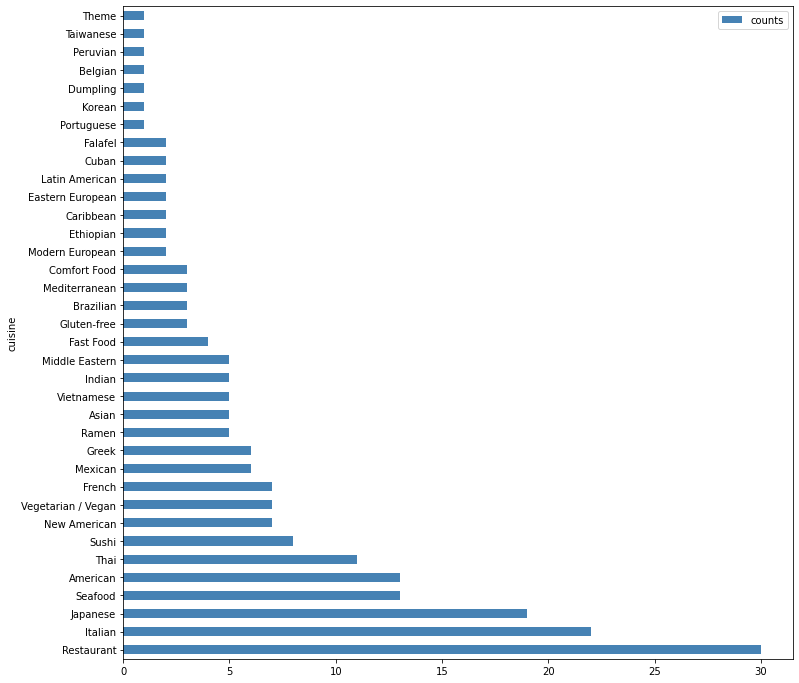

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns
dfrestTor.plot(kind='barh', figsize=(12, 12),color='steelblue')

### Analyze Each Neighborhood

#### Use one hot encoding (Convert catergory to numbers)

In [165]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
# check size
toronto_onehot.shape

(817, 173)

#### Putting number of occurence for each catergory with its corresponging Neighborhood

In [167]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,...,0.066667,0.000000,0.000000,0.00,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.033333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Commerce Court, Victoria Hotel",0.000000,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.035714,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [168]:
# new size
toronto_grouped.shape

(40, 173)

In [169]:
# print the top 5 most common venues for each neighborhood
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0            Beer Bar  0.07
1  Seafood Restaurant  0.07
2        Cocktail Bar  0.07
3      Farmers Market  0.07
4            Creperie  0.03


----Brockton, Parkdale Village, Exhibition Place----
                    venue  freq
0               Gift Shop  0.10
1              Restaurant  0.07
2             Coffee Shop  0.07
3      Italian Restaurant  0.07
4  Furniture / Home Store  0.07


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
          venue  freq
0   Coffee Shop  0.13
1          Café  0.10
2    Restaurant  0.07
3  Concert Hall  0.07
4       Theater  0.07


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                  venue  freq
0    Italian Restaurant  0.10
1  Gym / Fitness Center  0.07
2                  Park  0.07
3            Restaurant  0.07
4           Yoga Studio  0.03


----Central Bay Street----
            

In [170]:
# a function to transfer data to panda dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Create a dataframe and display the top 10 venues for each neighborhood

In [180]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Seafood Restaurant,Farmers Market,Cocktail Bar,Beer Bar,Coffee Shop,Café,Bistro,Restaurant,Jazz Club,Pharmacy
1,"Brockton, Parkdale Village, Exhibition Place",Gift Shop,Coffee Shop,Italian Restaurant,Furniture / Home Store,Restaurant,Bakery,Sandwich Place,Japanese Restaurant,Breakfast Spot,Café
2,"Business reply mail Processing Centre, South C...",Coffee Shop,Café,Concert Hall,Theater,Restaurant,Sushi Restaurant,Mediterranean Restaurant,Lounge,Opera House,Japanese Restaurant
3,"CN Tower, King and Spadina, Railway Lands, Har...",Italian Restaurant,Park,Gym / Fitness Center,Restaurant,Yoga Studio,Sandwich Place,Brewery,Ramen Restaurant,Café,Caribbean Restaurant
4,Central Bay Street,Coffee Shop,Clothing Store,Plaza,Pizza Place,Park,Sandwich Place,Bubble Tea Shop,Ramen Restaurant,Poke Place,Café


### Cluster Neighborhoods

In [181]:
# Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:70] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = toronto

# Use this code only once
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [179]:
#toronto_merged['Cluster Labels'] 
#toronto_merged.drop([19],inplace=True)
#toronto_merged.reset_index(inplace=True)
#toronto_merged.head(30)

,index,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264,3,Coffee Shop,Breakfast Spot,Restaurant,Food Truck,Event Space,Italian Restaurant,Electronics Store,Spa,Pub,Distribution Center
1,1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188,3,Coffee Shop,Park,Fried Chicken Joint,Falafel Restaurant,Burrito Place,Italian Restaurant,Café,Portuguese Restaurant,Bank,Mediterranean Restaurant
2,2,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804,3,Café,Ramen Restaurant,Clothing Store,Theater,Coffee Shop,College Rec Center,Burger Joint,Burrito Place,Plaza,Pizza Place
3,3,M5C,Downtown Toronto,St. James Town,43.65215,-79.37587,3,Café,Cosmetics Shop,Gastropub,Coffee Shop,Department Store,Restaurant,Farmers Market,Japanese Restaurant,Italian Restaurant,Bookstore
4,4,M4E,East Toronto,The Beaches,43.67709,-79.29547,3,Pub,Trail,Health Food Store,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
5,5,M5E,Downtown Toronto,Berczy Park,43.64536,-79.37306,3,Seafood Restaurant,Farmers Market,Cocktail Bar,Beer Bar,Coffee Shop,Café,Bistro,Restaurant,Jazz Club,Pharmacy
6,6,M5G,Downtown Toronto,Central Bay Street,43.65609,-79.38493,3,Coffee Shop,Clothing Store,Plaza,Pizza Place,Park,Sandwich Place,Bubble Tea Shop,Ramen Restaurant,Poke Place,Café
7,7,M6G,Downtown Toronto,Christie,43.66869,-79.42071,3,Café,Grocery Store,Italian Restaurant,Playground,Athletics & Sports,Coffee Shop,Baby Store,Candy Store,Wine Shop,Dumpling Restaurant
8,8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.64970,-79.38258,3,Café,American Restaurant,Coffee Shop,Gym,Restaurant,Seafood Restaurant,Greek Restaurant,Steakhouse,Gluten-free Restaurant,Gym / Fitness Center
9,9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.66505,-79.43891,3,Park,Grocery Store,Bank,Furniture / Home Store,Liquor Store,Middle Eastern Restaurant,Pharmacy,Pizza Place,Café,Brazilian Restaurant


In [182]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
# Use this code only once
#toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264,3,Coffee Shop,Breakfast Spot,Restaurant,Food Truck,Event Space,Italian Restaurant,Electronics Store,Spa,Pub,Distribution Center
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188,3,Coffee Shop,Park,Fried Chicken Joint,Falafel Restaurant,Burrito Place,Italian Restaurant,Café,Portuguese Restaurant,Bank,Mediterranean Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804,3,Café,Ramen Restaurant,Clothing Store,Theater,Coffee Shop,College Rec Center,Burger Joint,Burrito Place,Plaza,Pizza Place
3,M5C,Downtown Toronto,St. James Town,43.65215,-79.37587,3,Café,Cosmetics Shop,Gastropub,Coffee Shop,Department Store,Restaurant,Farmers Market,Japanese Restaurant,Italian Restaurant,Bookstore
4,M4E,East Toronto,The Beaches,43.67709,-79.29547,3,Pub,Trail,Health Food Store,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [183]:
# create map
map_clusters = folium.Map(location=[meanLatitude, meanLongitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [281]:
rainbow

['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']

In [297]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
 
map_clusters

## Part 5: Examine Cluster

### Define function for data analysis purposes

In [300]:
# define a function to find restaurants from the top 10th most common of the area
def countRestCluster (dfcluster):
    commanVStr = "Most Common Venue"
    restCluster = {}
    for index, row in dfcluster.iterrows():
        for i in range(1,11):
            s = ""
            if i == 1:
                s = s+"1st " + commanVStr
            elif i == 2:
                s = s+"2nd " + commanVStr
            elif i == 3:
                s = s+"3rd " + commanVStr
            else:
                s = str(i)+ "th " + commanVStr

            if "Restaurant" in  row[s]:
                key = row[s]
                key = key.replace(' Restaurant','')
                if key in restCluster.keys():
                    restCluster[key]=restCluster[key] + 1
                else:
                    restCluster[key]= 1    
    return restCluster

# count 
def clustDF(restClus):
    cuisineHere = [0]*len(restClus)
    countsHere=[0]*len(restClus)
    findex = 0
    for key, value in restClus.items():
        cuisineHere[findex] = key
        countsHere[findex] = value
        findex +=1
    dfrestClus = pd.DataFrame(data={'cuisine':cuisineHere,'counts':countsHere})
    dfrestClus.set_index('cuisine', inplace=True)
    return dfrestClus
    

### Cluster 0

In [301]:
# find this cluster
cluster0 = pd.DataFrame(toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]])
cluster0

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,0,Swim School,Bus Line,Business Service,Wine Shop,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
20,Toronto/York,0,Furniture / Home Store,Seafood Restaurant,Brewery,Home Service,Wine Shop,Donut Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


In [274]:
# Count the restaurant in this cluster from the top 10 most common venues
restCluster0=countRestCluster(cluster0)
restCluster0

{'Falafel': 2, 'Ethiopian': 2, 'Eastern European': 1, 'Seafood': 1}

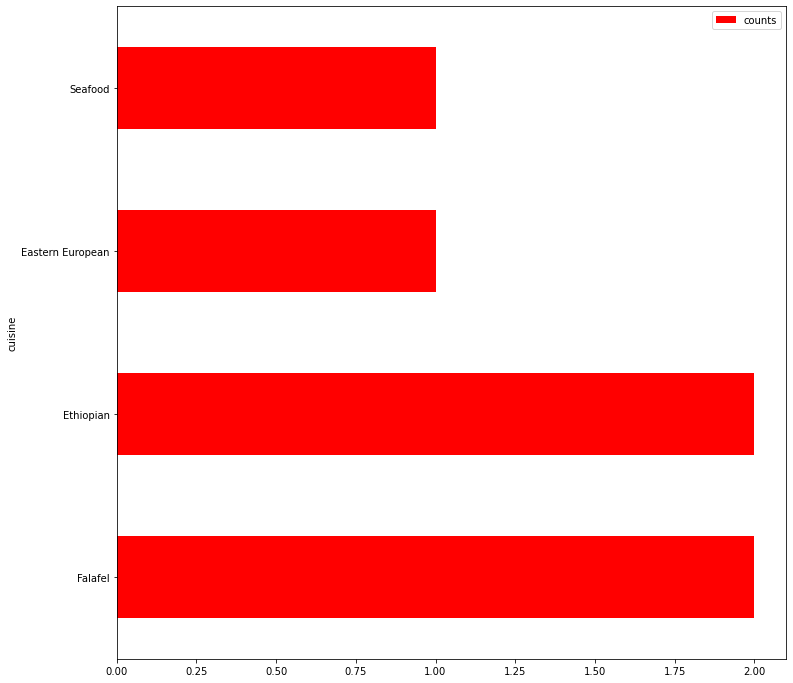

In [306]:
# Create a data frame of cuisine restaurant  from the top 10 most common venues
pandaClus0 = clustDF(restCluster0)

# Create a histogram to illustrate the data
pandaClus0.plot(kind='barh', figsize=(12, 12),color='Red') 

### Cluster 1

In [310]:
# find this cluster
cluster1 = pd.DataFrame(toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]])
cluster1

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,1,Park,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Distribution Center
24,Central Toronto,1,Park,Gym Pool,Playground,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
34,Downtown Toronto,1,Park,Bike Trail,Playground,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [311]:
 # Count the restaurant in this cluster from the top 10 most common venues
restCluster1=countRestCluster(cluster1)
restCluster1

{'Falafel': 3, 'Ethiopian': 3, 'Eastern European': 3, 'Dumpling': 3}

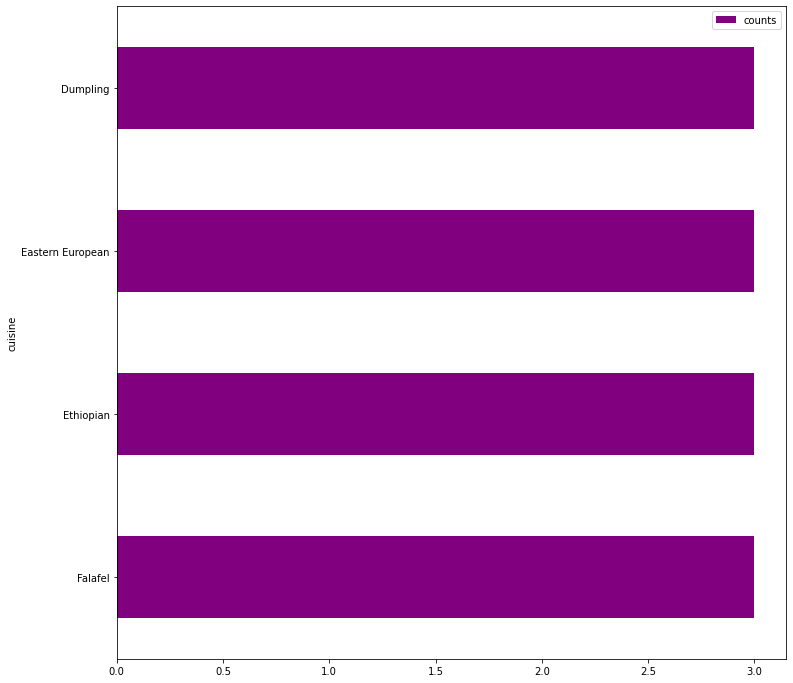

In [312]:
# Create a data frame of cuisine restaurant  from the top 10 most common venues
pandaClus1 = clustDF(restCluster1)

# Create a histogram to illustrate the data
pandaClus1.plot(kind='barh', figsize=(12, 12),color='Purple') 

### Cluster 2

In [ ]:
# find this cluster
cluster2 = pd.DataFrame(toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]])
cluster2

In [275]:
 # Count the restaurant in this cluster from the top 10 most common venues
restCluster2=countRestCluster(cluster2)
restCluster2

{'Falafel': 1, 'Ethiopian': 1, 'Eastern European': 1, 'Dumpling': 1}

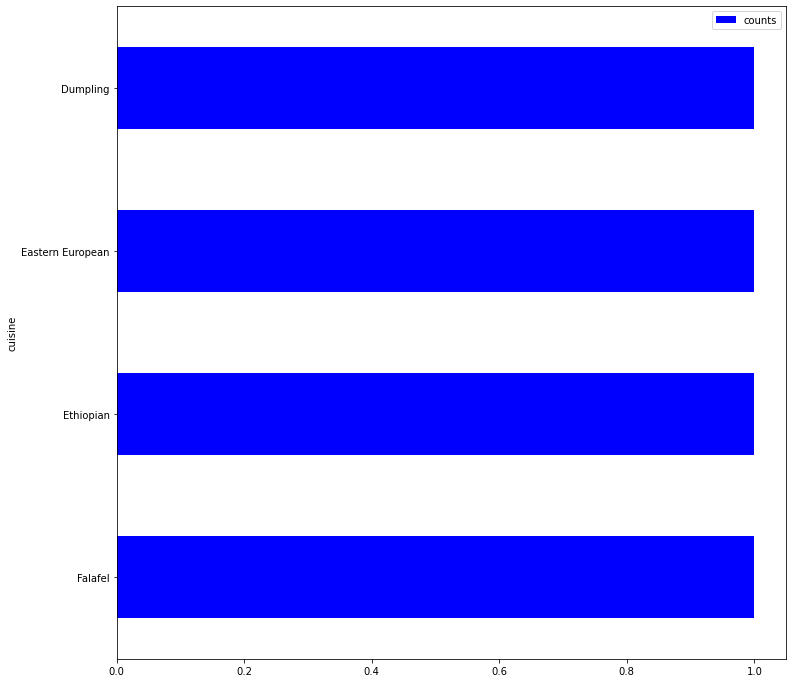

In [313]:
# Create a data frame of cuisine restaurant  from the top 10 most common venues
pandaClus2 = clustDF(restCluster2)

# Create a histogram to illustrate the data
pandaClus2.plot(kind='barh', figsize=(12, 12),color='Blue') 

### Cluster 3

In [302]:
# find this cluster
cluster3 = pd.DataFrame(toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]])
cluster3

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,3,Coffee Shop,Breakfast Spot,Restaurant,Food Truck,Event Space,Italian Restaurant,Electronics Store,Spa,Pub,Distribution Center
1,Downtown Toronto,3,Coffee Shop,Park,Fried Chicken Joint,Falafel Restaurant,Burrito Place,Italian Restaurant,Café,Portuguese Restaurant,Bank,Mediterranean Restaurant
2,Downtown Toronto,3,Café,Ramen Restaurant,Clothing Store,Theater,Coffee Shop,College Rec Center,Burger Joint,Burrito Place,Plaza,Pizza Place
3,Downtown Toronto,3,Café,Cosmetics Shop,Gastropub,Coffee Shop,Department Store,Restaurant,Farmers Market,Japanese Restaurant,Italian Restaurant,Bookstore
4,East Toronto,3,Pub,Trail,Health Food Store,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
5,Downtown Toronto,3,Seafood Restaurant,Farmers Market,Cocktail Bar,Beer Bar,Coffee Shop,Café,Bistro,Restaurant,Jazz Club,Pharmacy
6,Downtown Toronto,3,Coffee Shop,Clothing Store,Plaza,Pizza Place,Park,Sandwich Place,Bubble Tea Shop,Ramen Restaurant,Poke Place,Café
7,Downtown Toronto,3,Café,Grocery Store,Italian Restaurant,Playground,Athletics & Sports,Coffee Shop,Baby Store,Candy Store,Wine Shop,Dumpling Restaurant
8,Downtown Toronto,3,Café,American Restaurant,Coffee Shop,Gym,Restaurant,Seafood Restaurant,Greek Restaurant,Steakhouse,Gluten-free Restaurant,Gym / Fitness Center
9,West Toronto,3,Park,Grocery Store,Bank,Furniture / Home Store,Liquor Store,Middle Eastern Restaurant,Pharmacy,Pizza Place,Café,Brazilian Restaurant


In [303]:
 # Count the restaurant in this cluster from the top 10 most common venues
restCluster3=countRestCluster(cluster3)
restCluster3

{'Restaurant': 17,
 'Italian': 10,
 'Falafel': 4,
 'Portuguese': 1,
 'Mediterranean': 3,
 'Ramen': 3,
 'Japanese': 11,
 'Ethiopian': 4,
 'Eastern European': 5,
 'Dumpling': 3,
 'Seafood': 6,
 'American': 4,
 'Greek': 1,
 'Gluten-free': 1,
 'Middle Eastern': 1,
 'Brazilian': 1,
 'Vietnamese': 2,
 'Asian': 1,
 'New American': 1,
 'Korean': 1,
 'Fast Food': 1,
 'Latin American': 1,
 'Modern European': 1,
 'Indian': 3,
 'Thai': 1,
 'Caribbean': 2,
 'Sushi': 2,
 'Mexican': 1}

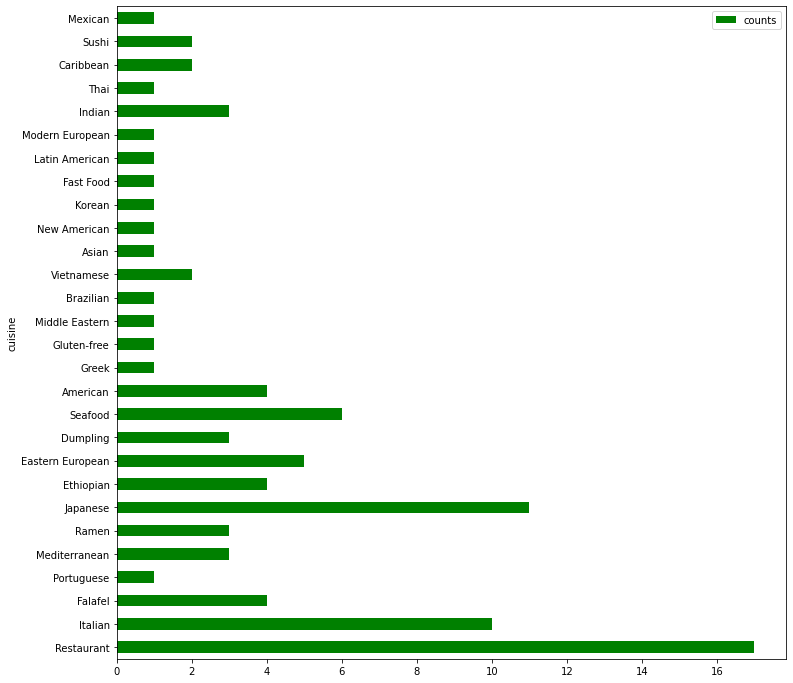

In [314]:
# Create a data frame of cuisine restaurant  from the top 10 most common venues
pandaClus3 = clustDF(restCluster3)

# Create a histogram to illustrate the data
pandaClus3.plot(kind='barh', figsize=(12, 12),color='Green') 

### Cluster 4

In [304]:
# find this cluster
cluster4 = pd.DataFrame(toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]])
cluster4

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Central Toronto,4,Gym,Restaurant,Wine Shop,Distribution Center,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [315]:
 # Count the restaurant in this cluster from the top 10 most common venues
restCluster4=countRestCluster(cluster4)
restCluster4

{'Restaurant': 1,
 'Falafel': 1,
 'Ethiopian': 1,
 'Eastern European': 1,
 'Dumpling': 1}

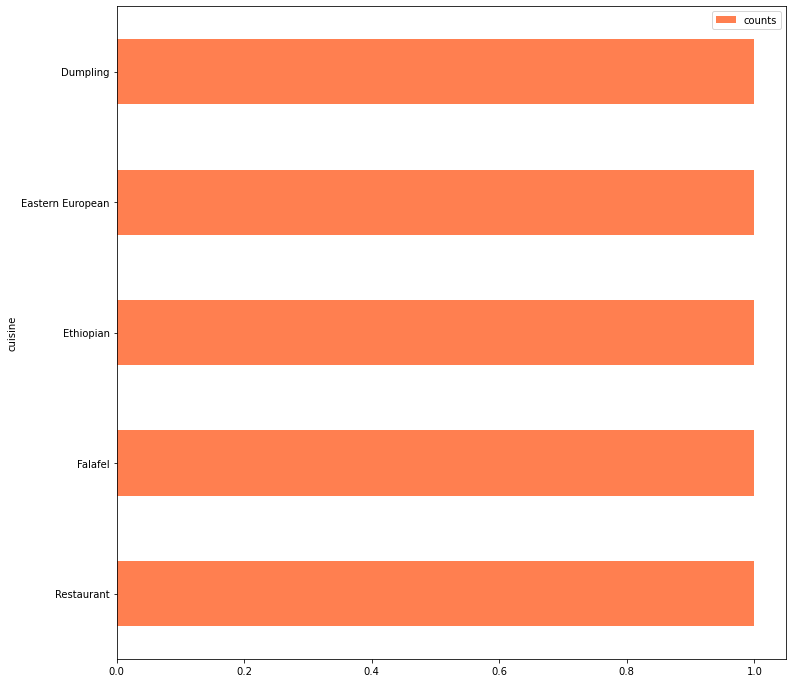

In [316]:
# Create a data frame of cuisine restaurant  from the top 10 most common venues
pandaClus4 = clustDF(restCluster4)

# Create a histogram to illustrate the data
pandaClus4.plot(kind='barh', figsize=(12, 12),color='Coral') 